In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt

In [11]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum(x1-x2)**2)
    return distance

from collections import Counter

In [13]:
class KNN:
    
    def __init__(self,k=3):
        self.k=k
        
    def fit(self, X, y):
        self.X_train= X
        self.y_train= y
    
    def _predict(self,x):
        
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
       
        k_indices= np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
     def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap({'#FF0000','#00FF00','#0000FF'})


In [31]:
iris=datasets.load_iris()
X, y= iris.data, iris.target
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=6969)

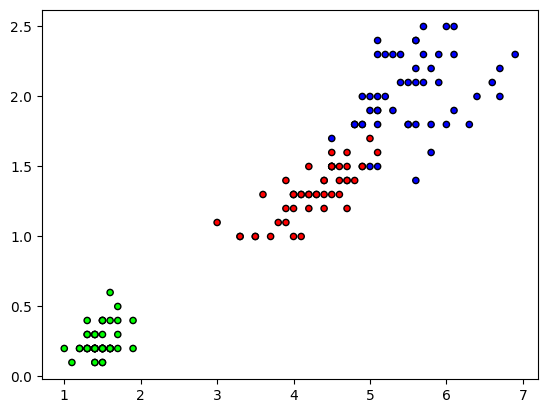

In [8]:
plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [32]:
clf = KNN(k=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

[1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0]


In [33]:
acc=np.sum(predictions== y_test)/len(y_test)
print(acc)

0.9333333333333333
